In [47]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii
from scipy import optimize

In [28]:
data = Table.read("ASTR19_F25_group_project_data.txt", format="ascii")
print(data)

col1  col2  col3
---- ----- -----
   1  8:07  6.57
   1 15:37 -0.39
   2  8:55  5.38
   2 16:25 -1.74
   3  9:45  5.26
   3 17:14 -1.36
   4 10:35  4.13
   4 18:00 -1.15
   5 11:28  3.48
   5 18:46 -1.61
 ...   ...   ...
  37  2:13  4.13
  37 20:00  1.21
  38  2:54  3.34
  38  9:54  2.58
  39  3:39  3.32
  39 11:15  3.26
  40  4:29  5.21
  40 12:22  2.39
  41  5:21  4.83
  41 13:14  2.41
Length = 82 rows


In [29]:
#Formatted data
fdata = Table()
fdata['a'] = [1.53333333333333, 2.21666666666667, 2.36666666666667, 2.9, 2.96666666666667, 3.36666666666667, 3.61666666666667, 3.65, 4.11666666666667, 4.38333333333333, 4.48333333333333, 4.83333333333333, 5.25, 5.35, 5.51666666666667, 6.13333333333333, 6.15, 6.78333333333333, 7.08333333333333, 7.36666666666667, 7.96666666666667, 7.98333333333333, 8.11666666666667, 8.56666666666667, 8.83333333333333, 8.91666666666667, 9.16666666666667, 9.66666666666667, 9.75, 9.75, 9.9, 10.35, 10.5, 10.5833333333333, 10.7333333333333, 10.95, 11.25, 11.3166666666667, 11.4666666666667, 11.6333333333333, 11.9166666666667, 11.9666666666667, 12.1666666666667, 12.3666666666667, 12.3666666666667, 12.4166666666667, 12.9333333333333, 12.95, 13.2333333333333, 13.4, 13.75, 13.8333333333333, 14.4166666666667, 14.65, 15, 15.45, 15.5666666666667, 15.6166666666667, 16.1333333333333, 16.1666666666667, 16.4166666666667, 16.6833333333333, 16.8666666666667, 17.2, 17.2333333333333, 17.5666666666667, 17.75, 18, 18.2, 18.25, 18.7666666666667, 18.8, 18.8166666666667, 19.3333333333333, 19.4, 19.5166666666667, 19.8666666666667, 20, 20.2666666666667, 20.5, 21.0166666666667, 21.7666666666667]
fdata['b'] = [3.45, 4.13, 4.1, 3.34, 3.17, 3.57, 3.71, 3.32, 4.54, 4.04, 5.21, 3.76, 4.07, 4.83, 3.9, 4.73, 5.93, 5.66, 6.89, 5.33, 6.72, 5.23, 6.57, 6.67, 6.77, 5.38, 4.74, 5.77, 5.26, 4.69, 2.58, 4.2, 4.35, 4.13, 3.1, 3.68, 3.26, 4.23, 3.48, 2.47, 2.49, 2.88, 2.24, 2.62, 2.39, 2.59, 1.92, 2.18, 2.41, 1.83, 1.74, 0.7, 0.79, 0.21, -0.04, 0.22, -1.12, -0.39, -0.61, -1.68, -1.74, -0.93, -1.32, -1.29, -1.36, -0.73, 0.22, -1.15, -0.38, 0.26, -1.61, 0.36, -0.61, 0.99, -0.46, 0.05, 1.87, 1.21, 1.01, 1.6, 0.73, 2.17]

#I've converted the hours to integer values and ordered them in the first column
#The second column is the tide level corresponding to each of those values
#This will make for a graph that shows the tide rising and falling over the day

print(fdata)

       a           b  
---------------- -----
1.53333333333333  3.45
2.21666666666667  4.13
2.36666666666667   4.1
             2.9  3.34
2.96666666666667  3.17
3.36666666666667  3.57
3.61666666666667  3.71
            3.65  3.32
4.11666666666667  4.54
4.38333333333333  4.04
             ...   ...
18.8166666666667 -0.61
19.3333333333333  0.99
            19.4 -0.46
19.5166666666667  0.05
19.8666666666667  1.87
            20.0  1.21
20.2666666666667  1.01
            20.5   1.6
21.0166666666667  0.73
21.7666666666667  2.17
Length = 82 rows


Text(0, 0.5, 'Tide level (feet)')

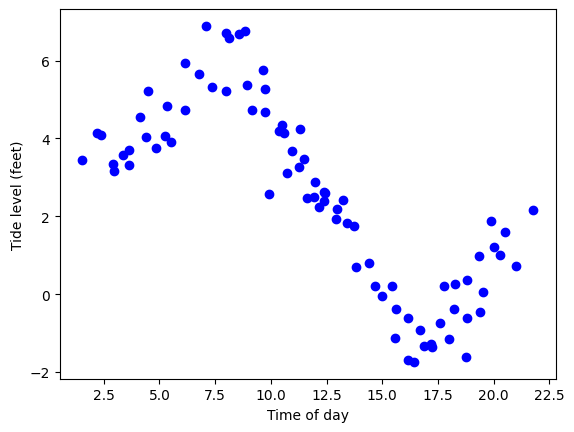

In [106]:
x1 = fdata['a'] #Time of day
y1 = fdata['b'] #Tide for each time of day data point

plt.plot(x1, y1, 'bo')

plt.xlabel('Time of day')
plt.ylabel('Tide level (feet)')



#I want the x tick labels to be in the hours:minutes format but as of uploading this that is not done

#Tried to do the line fit on here but the x values are all uneven cause they're the data set's time values,
#so the fit line was all wonky


3.132677037167673 0.247048960461374 0.06960146268262728 2.462630263144906


(0.0, 24.0)

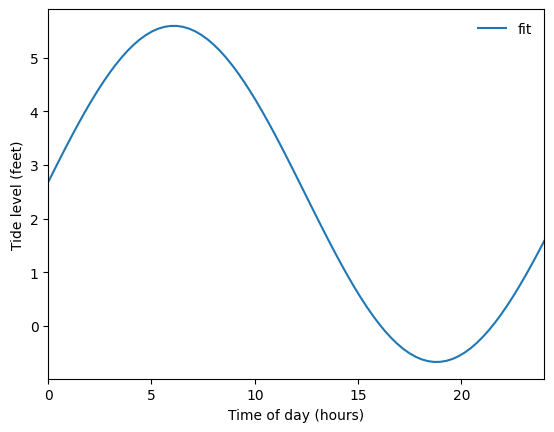

In [105]:
x = np.linspace(0, 24, 82)

def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

#perform fit
params, params_cov = optimize.curve_fit(f_line, x, y1, sigma=np.std(fdata['b']), p0=[4, 0.26, 0, 3])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit, b_fit, c_fit, d_fit)

y_fit = a_fit * np.sin(b_fit * x + c_fit) + d_fit

plt.plot(x, y_fit, label='fit')
plt.xlabel('Time of day (hours)')
plt.ylabel('Tide level (feet)')
plt.legend(loc=0, frameon=False)

plt.xlim([0, 24])

Text(0, 0.5, 'Tide level (feet)')

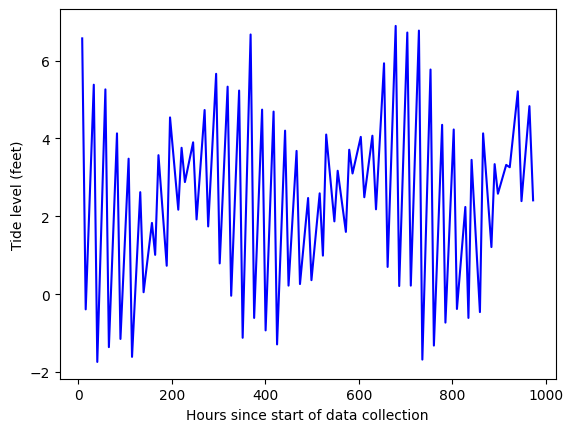

In [53]:
data['col4'] = [8.11666666666667, 15.6166666666667, 8.91666666666667, 16.4166666666667, 9.75, 17.2333333333333, 10.5833333333333, 18, 11.4666666666667, 18.7666666666667, 12.3666666666667, 19.5166666666667, 13.4, 20.2666666666667, 3.36666666666667, 21.0166666666667, 4.11666666666667, 21.7666666666667, 4.83333333333333, 11.9666666666667, 5.51666666666667, 12.9333333333333, 6.13333333333333, 13.75, 6.78333333333333, 14.4166666666667, 7.36666666666667, 15, 7.98333333333333, 15.5666666666667, 8.56666666666667, 16.1333333333333, 9.16666666666667, 16.6833333333333, 9.75, 17.2, 10.35, 17.75, 10.95, 18.25, 11.6333333333333, 18.8, 12.4166666666667, 19.3333333333333, 2.36666666666667, 19.8666666666667, 2.96666666666667, 20.5, 3.61666666666667, 10.7333333333333, 4.38333333333333, 11.9166666666667, 5.25, 12.95, 6.15, 13.8333333333333, 7.08333333333333, 14.65, 7.96666666666667, 15.45, 8.83333333333333, 16.1666666666667, 9.66666666666667, 16.8666666666667, 10.5, 17.5666666666667, 11.3166666666667, 18.2, 12.1666666666667, 18.8166666666667, 1.53333333333333, 19.4, 2.21666666666667, 20, 2.9, 9.9, 3.65, 11.25, 4.48333333333333, 12.3666666666667, 5.35, 13.2333333333333]
#adding integer values of time to the first data set

x2 = ((data['col1'] - 1)*24) + data['col4']
y2 = data['col3']

plt.plot(x2, y2, 'b-')
plt.xlabel('Hours since start of data collection')
plt.ylabel('Tide level (feet)')

In [32]:
#There's a trend here too. Every ~200 hours the difference between our two measurements in a day switches between
#relatively large and relatively small
#Meaning there are stretches of days where the tide doesn't change much and stretches of days where it changes a lot
#and these alternate, we can see three of each period in this 41 day span
#I think it's best to display this as a line because it's the tide moving up and down, moving between the measured values

Text(0, 0.5, 'Difference between high and low measurement')

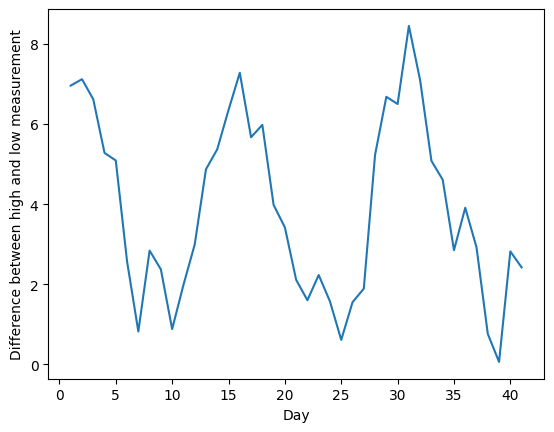

In [33]:
data3 = Table()
data3['1'] = [6.57, 5.38, 5.26, 4.13, 3.48, 2.62, 1.83, 3.57, 4.54, 3.76, 3.9, 4.73, 5.66, 5.33, 5.23, 6.67, 4.74, 4.69, 4.2, 3.68, 2.47, 2.59, 4.1, 3.17, 3.71, 4.04, 4.07, 5.93, 6.89, 6.72, 6.77, 5.77, 4.35, 4.23, 2.24, 3.45, 4.13, 3.34, 3.32, 5.21, 4.83]
#First value on each day
data3['2'] = [-0.39, -1.74, -1.36, -1.15, -1.61, 0.05, 1.01, 0.73, 2.17, 2.88, 1.92, 1.74, 0.79, -0.04, -1.12, -0.61, -0.93, -1.29, 0.22, 0.26, 0.36, 0.99, 1.87, 1.6, 3.1, 2.49, 2.18, 0.7, 0.21, 0.22, -1.68, -1.32, -0.73, -0.38, -0.61, -0.46, 1.21, 2.58, 3.26, 2.39, 2.41]
#Second value on each day
data3['3'] = range(1, 41+1)

xday = data3['3']
y3 = (data3['1'] - data3['2'])
#Difference in each day's two measurements

plt.plot(x3, y3)
plt.xlabel("Day")
plt.ylabel('Difference between high and low measurement')

In [34]:
#This graph never going into the negative also confirms that the first measurement in a day is always higher
#than the second. 
#We're not told whether the measurements are highest and lowest tide of the day (as far as I'm aware of) but that seems
#like a pretty safe assumption

Text(0.5, 0, 'Day')

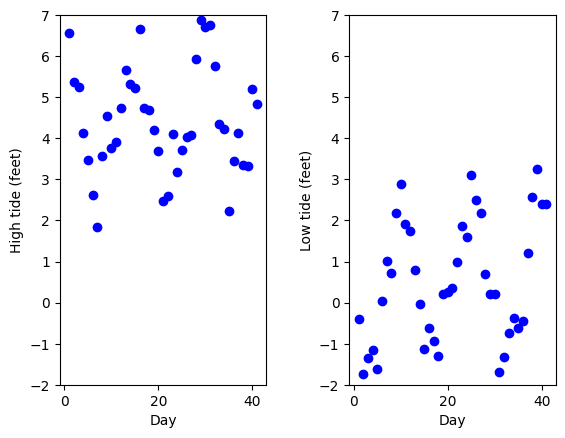

In [46]:
f, axarr = plt.subplots(1, 2)

yhigh = data3['1']
ylow = data3['2']

axarr[0].plot(xday, yhigh, 'bo')
axarr[1].plot(xday, ylow, 'bo')

axarr[0].set_ylim([-2, 7])
axarr[1].set_ylim([-2, 7])

axarr[0].set_ylabel('High tide (feet)')
axarr[1].set_ylabel('Low tide (feet)')
f.subplots_adjust(wspace = 0.4)
axarr[0].set_xlabel('Day')
axarr[1].set_xlabel('Day')